In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pizza-sales-dataset/pizza_sales.csv


In [2]:
data = pd.read_csv('/kaggle/input/pizza-sales-dataset/pizza_sales.csv')
data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
data.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [4]:
data.dtypes

pizza_id             float64
order_id             float64
pizza_name_id         object
quantity             float64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [5]:
data.shape

(48620, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [7]:
data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [8]:
data['total_price'].value_counts()

total_price
20.75    8485
12.00    5465
16.00    4428
16.75    4211
16.50    3970
12.50    3278
20.25    2971
12.75    2485
20.50    1971
18.50    1310
17.95    1230
16.25    1094
10.50     982
12.25     810
9.75      727
15.25     696
14.75     568
11.00     562
25.50     558
23.65     470
13.25     463
14.50     385
17.50     378
21.00     209
41.50     195
24.00     128
33.50      80
33.00      69
40.50      61
37.00      48
25.00      48
32.00      44
35.90      43
35.95      28
41.00      26
24.50      20
32.50      18
30.50      16
19.50      12
47.30      10
26.50      10
29.50       9
51.00       8
22.00       8
29.00       6
36.00       5
62.25       4
48.00       4
35.00       3
50.25       3
48.75       2
37.50       2
83.00       1
61.50       1
49.50       1
55.50       1
Name: count, dtype: int64

<Axes: xlabel='total_price'>

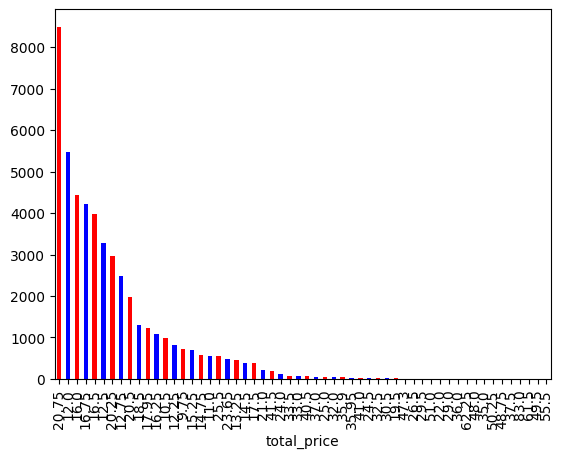

In [9]:
import matplotlib.pyplot as plt

data['total_price'].value_counts().plot(kind='bar', color=['red', 'blue'])


<Axes: xlabel='unit_price'>

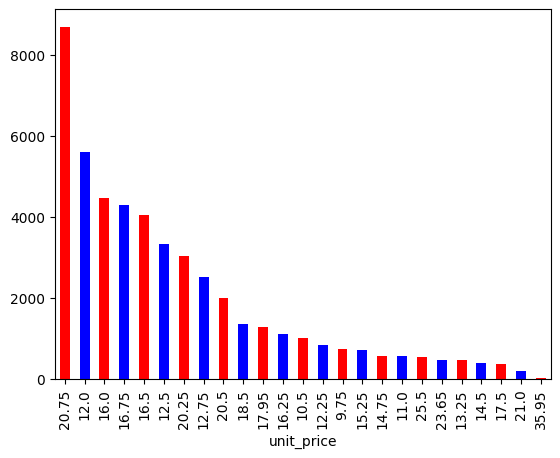

In [10]:
data['unit_price'].value_counts().plot(kind='bar', color=['red', 'blue'])


<Axes: xlabel='pizza_category'>

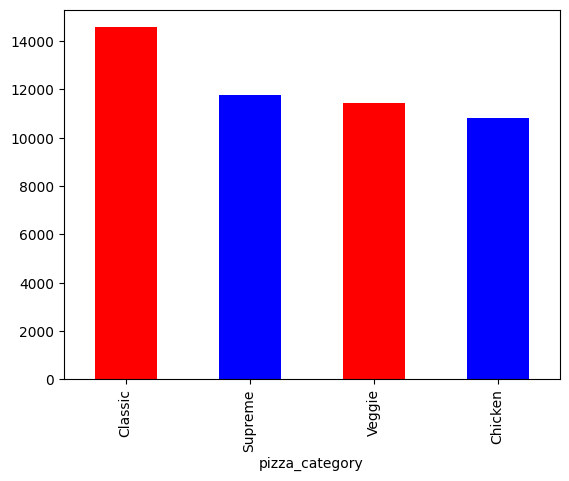

In [11]:

data['pizza_category'].value_counts().plot(kind='bar', color=['red', 'blue'])


In [12]:
data.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [13]:
df = data.drop(['order_date', 'order_time', 'pizza_ingredients', 'pizza_name', 'pizza_name_id'], axis=1)
df.head(2)

,pizza_id,order_id,quantity,unit_price,total_price,pizza_size,pizza_category
0,1.0,1.0,1.0,13.25,13.25,M,Classic
1,2.0,2.0,1.0,16.00,16.00,M,Classic


In [14]:
data_encoded = pd.get_dummies(df, columns=['pizza_name_id', 'pizza_size', 'pizza_category'])

KeyError: "['pizza_name_id'] not in index"

In [ ]:
data_encoded = data_encoded.astype(int)
data_encoded.dtypes

In [ ]:
df.head()

In [ ]:
data_encoded.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['pizza_category'] = label_encoder.fit_transform(df['pizza_category'])

print(df)

In [ ]:
X = df.drop(['pizza_category', 'pizza_size'], axis=1)
y = df['pizza_category']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score

p = model.predict(X_test)

y = p[:len(y_test)]

print(r2_score(y_test, y))


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


model_gb = GradientBoostingRegressor(random_state=42)

model_gb.fit(X_train, y_train)

y_pred_gb = model_gb.predict(X_test)

r2_gb = r2_score(y_test, y_pred_gb)

print(f"R-squared score with Gradient Boosting Regressor: {r2_gb}")

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}

model_xgb = xgb.train(params, dtrain, num_boost_round=100)

y_pred_xgb = model_xgb.predict(dtest)

r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"R-squared score with XGBoost: {r2_xgb}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_logistic = LogisticRegression(random_state=42)

model_logistic.fit(X_train_scaled, y_train)

y_pred_logistic = model_logistic.predict(X_test_scaled)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy with Logistic Regression: {accuracy_logistic}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy with Random Forest Classifier: {accuracy_rf}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
